In [34]:
# Import libraries need for Decision Tree Model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the dataset to python
df=pd.read_csv('wine.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Low,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Medium,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Medium,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Medium,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Low,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,Medium,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,High,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,High,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,Medium,5


In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

In [5]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
Alcohol_content           3
quality                   6
dtype: int64

In [6]:
# The alcohol content have to be encoded as it is catagorical data
from sklearn.preprocessing import OrdinalEncoder

In [7]:
df['Alcohol_content'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [8]:
enc = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])

In [9]:
df['Alcohol_content']=enc.fit_transform(df['Alcohol_content'].to_numpy().reshape(-1, 1))

In [10]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [11]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1.0,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1.0,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1.0,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1.0,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,2.0,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,2.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1.0,5


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [13]:
z=df.corr()

In [14]:
z['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
Alcohol_content         0.404764
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot:>

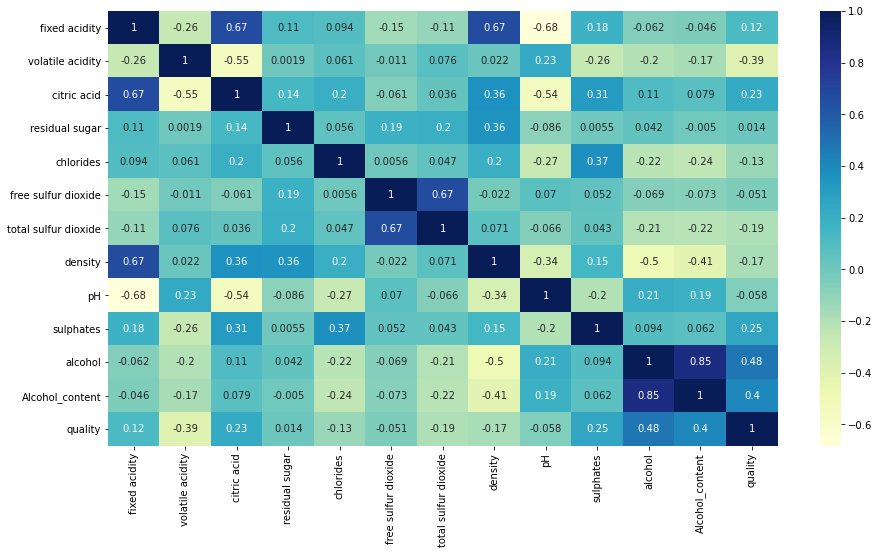

In [15]:
#To see the correlation between the parameters
plt.figure(figsize = (15,8))
sns.heatmap(z,annot=True, cmap="YlGnBu")

In [16]:
# As alcohol and Alcohol_content are correlated one of the columns can be dropped
z['quality'].abs()

fixed acidity           0.124052
volatile acidity        0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides               0.128907
free sulfur dioxide     0.050656
total sulfur dioxide    0.185100
density                 0.174919
pH                      0.057731
sulphates               0.251397
alcohol                 0.476166
Alcohol_content         0.404764
quality                 1.000000
Name: quality, dtype: float64

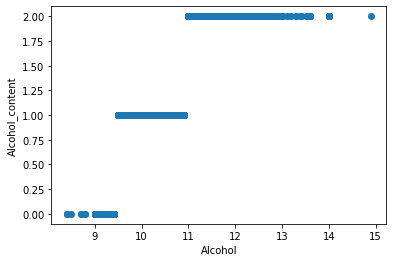

In [17]:
# To see the alcohol content and alcohol are correclated
plt.scatter(df['alcohol'], df['Alcohol_content'])
plt.xlabel('Alcohol')
plt.ylabel('Alcohol_content')
plt.show()

In [18]:
# Neglecting the acohol content column
X=df.drop(columns=['Alcohol_content','quality'])
y=df.quality

In [19]:
scalar= StandardScaler()
X_scaled=scalar.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X_scaled,y,test_size = 0.25,random_state=41)

In [27]:
# Model formation
clf=DecisionTreeClassifier()

In [28]:
X_train.shape

(1199, 11)

In [29]:
y_train.shape

(1199,)

In [30]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
pred=clf.predict(X_test)

In [32]:
confusion_matrix(pred,y_test)

array([[  0,   2,   0,   0,   0,   0],
       [  1,   0,   6,   5,   1,   0],
       [  2,   8, 113,  33,   8,   1],
       [  0,   1,  34, 109,  13,   1],
       [  0,   0,   4,  19,  33,   1],
       [  0,   0,   0,   2,   2,   1]], dtype=int64)

In [35]:
accuracy_score(pred,y_test)

0.64

In [41]:
clf.score(X_train,y_train)

1.0

In [42]:
from sklearn.model_selection import GridSearchCV

In [57]:
grid_param={
    'criterion':['gini','entropy'],
    'max_depth': range(10,15),
    'min_samples_leaf': range(2,10),
    'min_samples_split': range(3,10),
    'max_leaf_nodes': range(2,4)
}

In [65]:
tuned_XG_clf=GridSearchCV(estimator=clf, param_grid=grid_param, cv=4, n_jobs= -1)

In [66]:
tuned_XG_clf.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(2, 4),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [67]:
tuned_XG_clf.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [68]:
clf1=DecisionTreeClassifier(criterion='gini',
 max_depth=10,
 max_leaf_nodes=2,
 min_samples_leaf=2,
 min_samples_split=3)

In [69]:
clf1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=2, min_samples_leaf=2,
                       min_samples_split=3)

In [70]:
pre=clf.predict(X_test)

In [71]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.72      0.68      0.70       165
           6       0.65      0.69      0.67       158
           7       0.58      0.58      0.58        57
           8       0.25      0.20      0.22         5

    accuracy                           0.64       400
   macro avg       0.37      0.36      0.36       400
weighted avg       0.64      0.64      0.64       400

